In [1]:
!pip install mlxtend

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
import re

In [3]:
df = pd.read_csv('../00 Datasets/Customer Preference Survey (Responses) - Form Responses 1.csv')
df.head(5)

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,...,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,...,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [4]:
#Drop first row
df = df.drop(0)
df.head(5)

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,...,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,...,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
5,10/17/2021 17:43:55,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ


In [5]:
#drop duplicated 'PS5' column and unused 'timestamp' column
df_clean = df.drop(columns=['PS5', 'Timestamp'])
df_clean

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,...,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,...,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
5,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
6,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
7,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
8,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ
9,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
10,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [6]:
#Fill NA with 0
df_clean = df_clean.fillna(0)
df_clean

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,...,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,...,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
5,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
6,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
7,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
8,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,0,เคยซื้อ,เคยซื้อ,เคยซื้อ
9,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,...,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
10,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,...,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [7]:
#Encoding
df_clean.replace(re.compile('.*ไม่*'), 0, inplace=True)
df_clean.replace(re.compile('.*เคย*'), 1, inplace=True)
df_clean

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,...,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
5,0,0,0,1,0,1,0,1,1,0,...,0,0,1,1,0,1,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0
8,0,0,0,1,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,1
9,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
10,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0


In [8]:
#Fitlering out basket with only 1 item
basket_encode_final_df = df_clean[(df_clean > 0).sum(axis=1) >= 2]
basket_encode_final_df

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,...,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
5,0,0,0,1,0,1,0,1,1,0,...,0,0,1,1,0,1,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0
8,0,0,0,1,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,1
9,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
10,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0


In [9]:
freq_items_set = apriori(basket_encode_final_df, 
                         min_support=0.1, 
                         use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

freq_items_set['total_items'] = freq_items_set['itemsets'].apply(lambda x: len(x))

freq_items_set

,support,itemsets,total_items
0,0.847826,(Salmon Sashimi),1
1,0.826087,(ยาดม),1
2,0.804348,(External Harddisk),1
3,0.739130,(Bluetooth Speaker),1
4,0.739130,"(ยาดม, Salmon Sashimi)",2
...,...,...,...
10686,0.108696,"(แก้วเก็บความเย็น, Robot ดูดฝุ่น, ขนมจีนน้ำยาป...",6
10687,0.108696,"(แก้วเก็บความเย็น, Robot ดูดฝุ่น, ขนมจีนน้ำยาป...",6
10688,0.108696,"(แก้วเก็บความเย็น, Robot ดูดฝุ่น, ขนมจีนน้ำยาป...",6
10689,0.108696,"(แก้วเก็บความเย็น, Robot ดูดฝุ่น, เครื่องซักผ้...",6


In [10]:
rules = association_rules(freq_items_set, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(หม้อทอดไร้น้ํามัน, ขนมจีนน้ำยาปู, ยาดม, พลาสเ...","(External Harddisk, เครื่องซักผ้า, ลู่วิ่งออกก...",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826
1,"(ขนมจีนน้ำยาปู, External Harddisk, หนังสือ pyt...","(ลู่วิ่งออกกำลังกาย, Bluetooth Speaker, Salmon...",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826
2,"(ลู่วิ่งออกกำลังกาย, เครื่องซักผ้า, ยาดม)","(หม้อทอดไร้น้ํามัน, ขนมจีนน้ำยาปู, External Ha...",0.108696,0.130435,0.108696,1.000000,7.666667,0.094518,inf
3,"(Mechanical keyboard, หม้อทอดไร้น้ํามัน, ยาดม,...","(แก้วเก็บความเย็น, ขนมจีนน้ำยาปู, External Har...",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826
4,"(หม้อทอดไร้น้ํามัน, ขนมจีนน้ำยาปู, External Ha...","(ลู่วิ่งออกกำลังกาย, เครื่องซักผ้า)",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826
...,...,...,...,...,...,...,...,...,...
781579,"(External Harddisk, เครื่องซักผ้า, Bluetooth S...",(Mechanical keyboard),0.304348,0.500000,0.152174,0.500000,1.000000,0.000000,1.000000
781580,(หนังสือ python),"(แก้วเก็บความเย็น, Bluetooth Speaker, พลาสเตอร...",0.500000,0.304348,0.152174,0.304348,1.000000,0.000000,1.000000
781581,"(External Harddisk, ขนมจีนน้ำยาปู)","(หนังสือ python, พลาสเตอร์บรรเทาปวด ตราเสือ)",0.500000,0.260870,0.130435,0.260870,1.000000,0.000000,1.000000
781582,"(หนังสือ python, พลาสเตอร์บรรเทาปวด ตราเสือ)","(External Harddisk, ขนมจีนน้ำยาปู)",0.260870,0.500000,0.130435,0.500000,1.000000,0.000000,1.000000


In [11]:
rules['antecedents_length'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequents_length'] = rules['consequents'].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,"(หม้อทอดไร้น้ํามัน, ขนมจีนน้ำยาปู, ยาดม, พลาสเ...","(External Harddisk, เครื่องซักผ้า, ลู่วิ่งออกก...",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826,5,4
1,"(ขนมจีนน้ำยาปู, External Harddisk, หนังสือ pyt...","(ลู่วิ่งออกกำลังกาย, Bluetooth Speaker, Salmon...",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826,5,3
2,"(ลู่วิ่งออกกำลังกาย, เครื่องซักผ้า, ยาดม)","(หม้อทอดไร้น้ํามัน, ขนมจีนน้ำยาปู, External Ha...",0.108696,0.130435,0.108696,1.000000,7.666667,0.094518,inf,3,5
3,"(Mechanical keyboard, หม้อทอดไร้น้ํามัน, ยาดม,...","(แก้วเก็บความเย็น, ขนมจีนน้ำยาปู, External Har...",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826,4,5
4,"(หม้อทอดไร้น้ํามัน, ขนมจีนน้ำยาปู, External Ha...","(ลู่วิ่งออกกำลังกาย, เครื่องซักผ้า)",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826,5,2
...,...,...,...,...,...,...,...,...,...,...,...
781579,"(External Harddisk, เครื่องซักผ้า, Bluetooth S...",(Mechanical keyboard),0.304348,0.500000,0.152174,0.500000,1.000000,0.000000,1.000000,5,1
781580,(หนังสือ python),"(แก้วเก็บความเย็น, Bluetooth Speaker, พลาสเตอร...",0.500000,0.304348,0.152174,0.304348,1.000000,0.000000,1.000000,1,3
781581,"(External Harddisk, ขนมจีนน้ำยาปู)","(หนังสือ python, พลาสเตอร์บรรเทาปวด ตราเสือ)",0.500000,0.260870,0.130435,0.260870,1.000000,0.000000,1.000000,2,2
781582,"(หนังสือ python, พลาสเตอร์บรรเทาปวด ตราเสือ)","(External Harddisk, ขนมจีนน้ำยาปู)",0.260870,0.500000,0.130435,0.500000,1.000000,0.000000,1.000000,2,2


In [12]:
#Fitering criteria lift >=2 , support >= 0.1 and confidence >= 0.5 for single item pair
rules[ (rules['antecedents_length'] <= 1) &
        (rules['consequents_length'] <= 1) &
        (rules['lift'] >= 2) &
        (rules['support'] >= 0.1) &
        (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
95,(ทรายแมว),(น้ำพุแมว),0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826,1,1
96,(น้ำพุแมว),(ทรายแมว),0.108696,0.130435,0.108696,1.000000,7.666667,0.094518,inf,1,1
59945,(กระติกน้ำ 2 ลิตร),(เครื่องอบผ้า),0.217391,0.130435,0.108696,0.500000,3.833333,0.080340,1.739130,1,1
59951,(เครื่องอบผ้า),(กระติกน้ำ 2 ลิตร),0.130435,0.217391,0.108696,0.833333,3.833333,0.080340,4.695652,1,1
320653,(Logitech Mx Master 3 Mouse),(เครื่องชงกาแฟแคปซูล),0.130435,0.347826,0.108696,0.833333,2.395833,0.063327,3.913043,1,1
446668,(ไฟส่องหน้าไลฟ์สด),(Mechanical keyboard),0.130435,0.500000,0.130435,1.000000,2.000000,0.065217,inf,1,1
447218,(Nintendo switch),(หนังสือ python),0.130435,0.500000,0.130435,1.000000,2.000000,0.065217,inf,1,1
449124,(gaming chair),(Mechanical keyboard),0.108696,0.500000,0.108696,1.000000,2.000000,0.054348,inf,1,1


# Sample interesting item-pair for product recommedation with actions

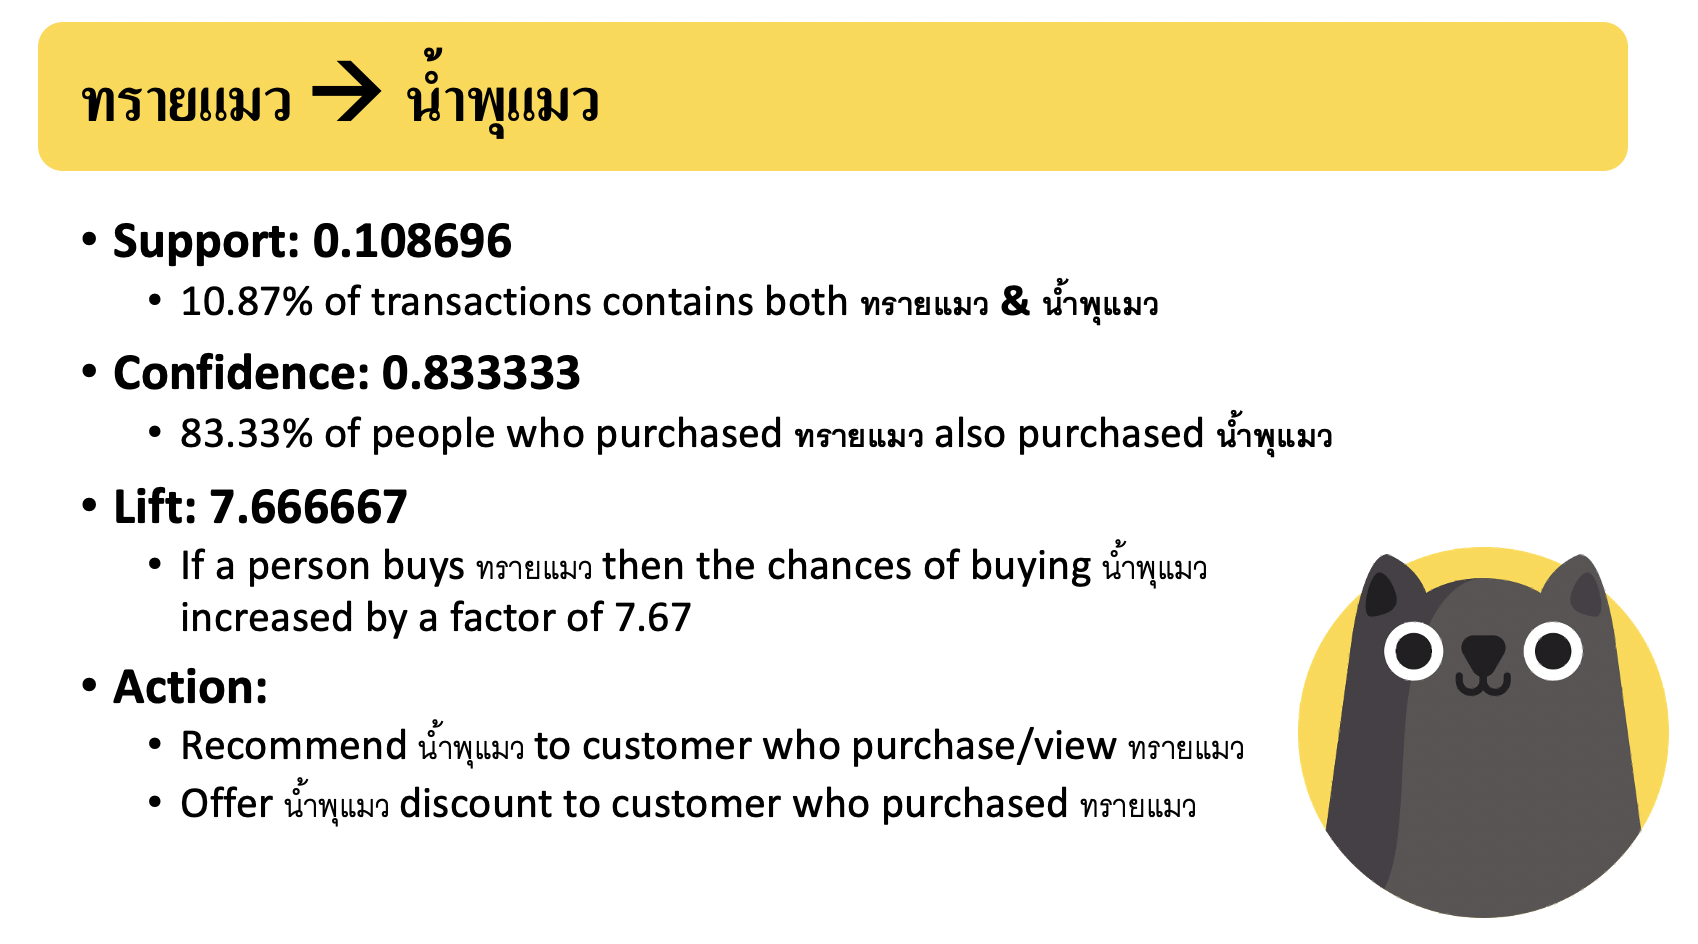

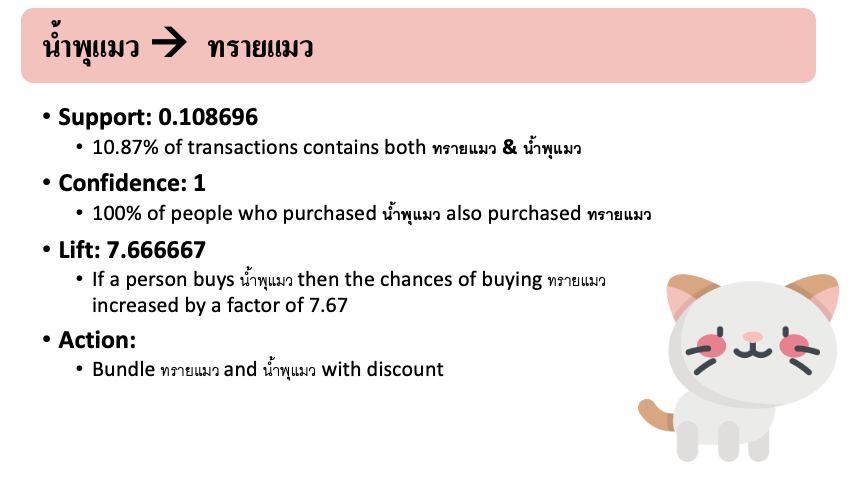

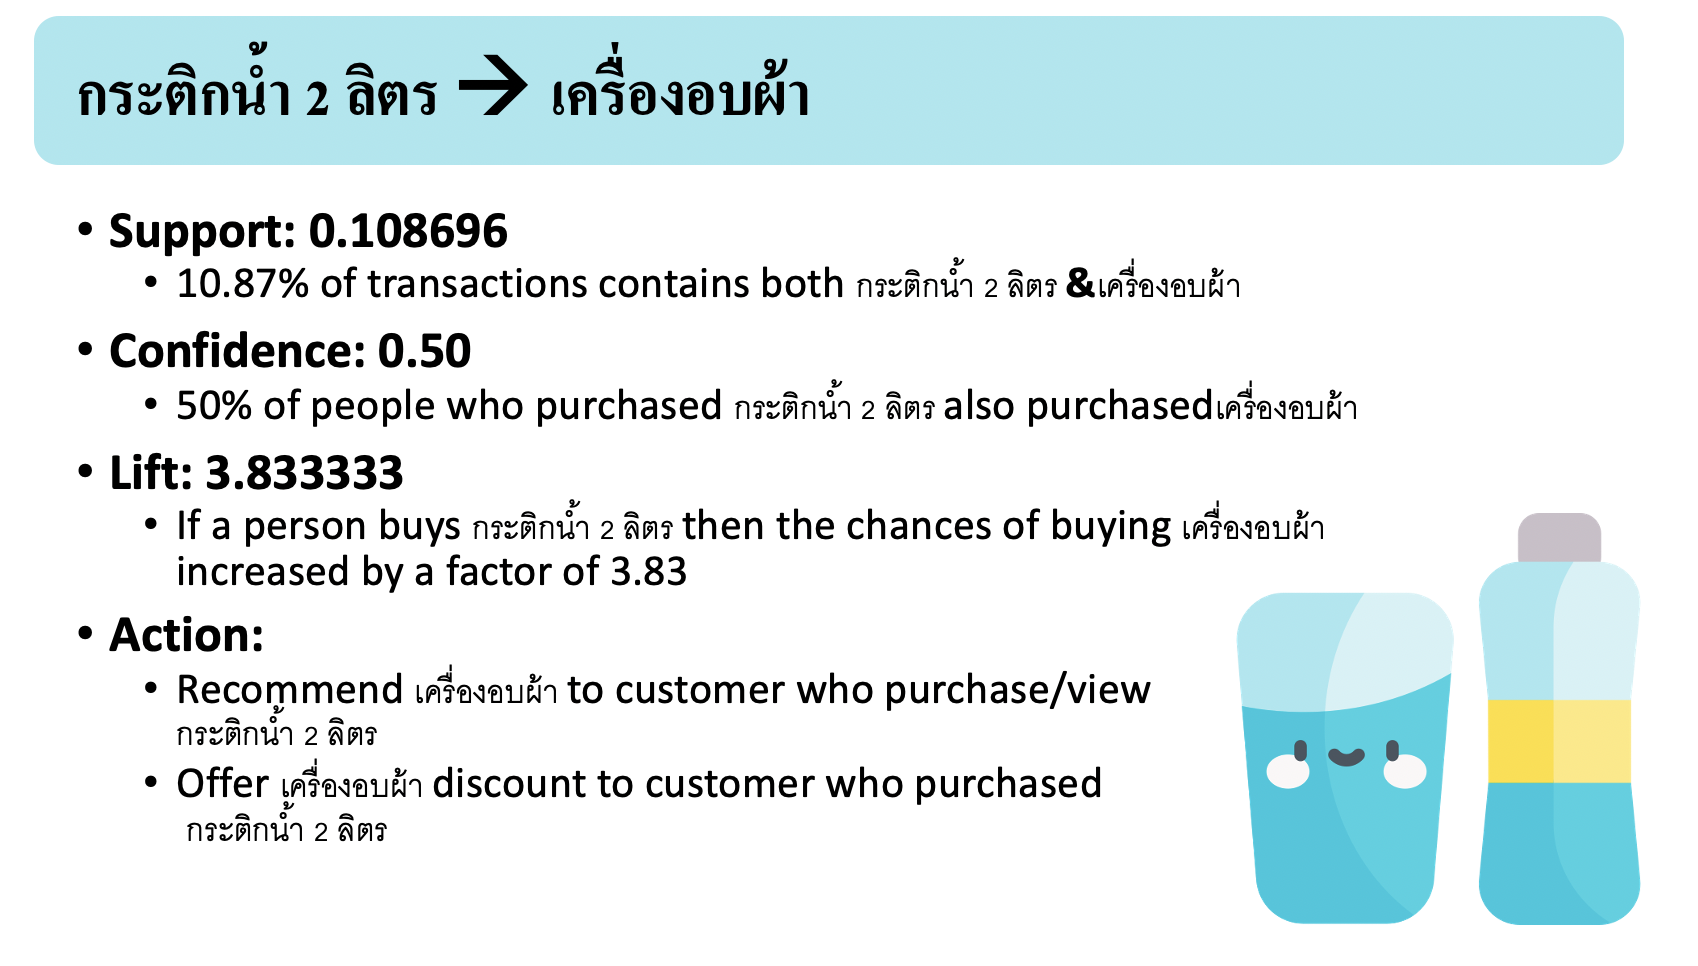

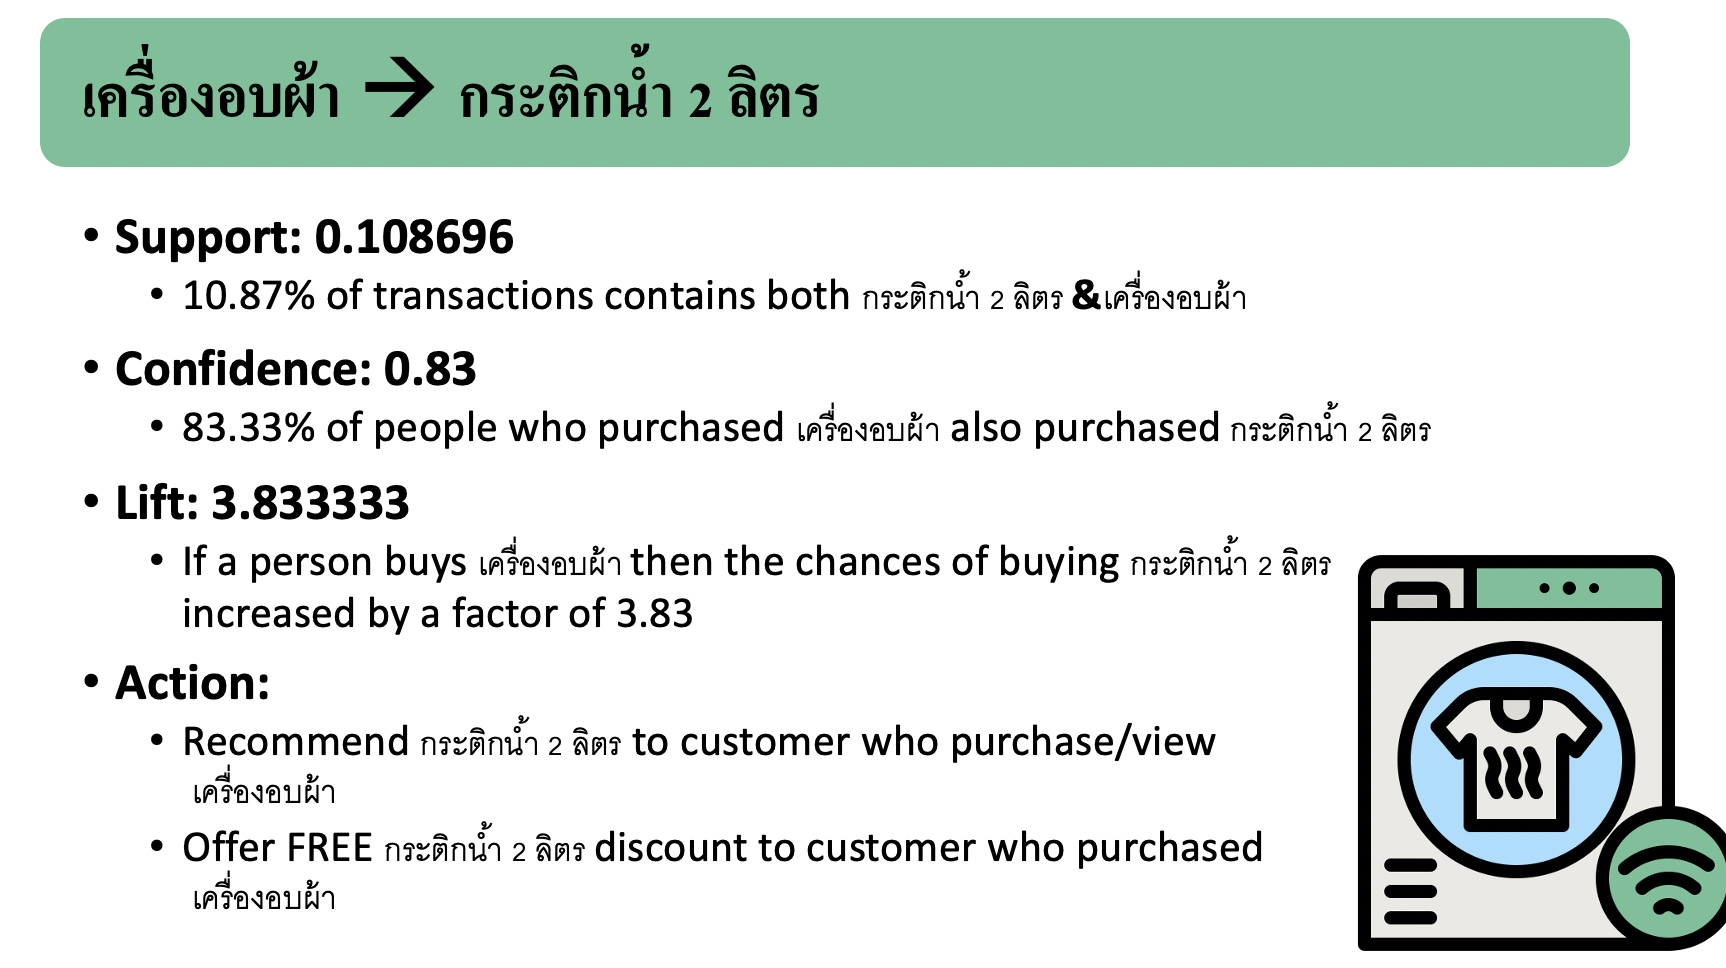

In [13]:
# fig, ax = plt.subplots(figsize=(10,4))
# GA = nx.from_pandas_edgelist(rules, source='antecedents', target = 'consequents')
# nx.draw(GA, with_labels=True)
# plt.show()